In [143]:
# Import necessary libraries
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Dataset & EDA Analysis


In [144]:
# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/CustomerChurn_dataset.csv')

In [145]:
# Display the first few rows of the dataset
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [146]:
# Display the shape of the dataset
data.shape

(7043, 21)

In [147]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [148]:
# Drop the 'customerID' column as it's not needed for analysis
data.drop('customerID',axis = 1 ,inplace = True)

In [149]:
# Convert 'TotalCharges' to numeric, handling errors by coercing to NaN
data['TotalCharges'] =pd.to_numeric(data['TotalCharges'], errors='coerce')

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [151]:
 # Fill missing values in 'TotalCharges' with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0)

In [152]:
# Display information after handling missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Encoding the Columns

In [153]:
# Label encode categorical columns
label_encode = LabelEncoder()

In [154]:
columns_to_encode = ['Partner','gender','Dependents','PhoneService','OnlineSecurity','DeviceProtection','TechSupport','Contract','MultipleLines',
                     'InternetService','PaymentMethod',
                     'PaperlessBilling','StreamingMovies','StreamingTV','OnlineBackup','Churn']

In [155]:
for column in columns_to_encode:
  data[column]=label_encode.fit_transform(data[column])

In [156]:
# Display the modified dataset
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [157]:
# Display information after label encoding
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [158]:
# Separate features and target variable
y= data['Churn']
X = data.drop('Churn',axis=1)


In [159]:
# Standardize the features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_scaled_df = pd.DataFrame(x_scaled, columns=X.columns)

data = pd.concat([x_scaled_df, y], axis=1)

In [160]:
# Display the modified dataset after standardization
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.992611,0
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.172165,0
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-0.958066,1
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.193672,0
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-0.938874,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,-0.127605,0
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,2.242606,0
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.852932,0
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.870513,1


# Feature Selection

In [161]:
# Feature selection using Recursive Feature Elimination with Cross-Validation (RFECV)
from sklearn.feature_selection import RFECV
X = data.drop(columns=['Churn'])
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [162]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

rfecv = RFECV(estimator=rfc, step=1, cv=3, scoring='accuracy')

rfecv .fit(X_train,y_train)
selected_features = X_train.columns[rfecv.support_]

In [163]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_features = X.columns[support_mask]

In [164]:
# Display the selected features
selected_features

Index(['gender', 'SeniorCitizen', 'Partner', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [165]:
# define yout taget and selected indipendent variables
X = data[selected_features]
y = data['Churn']

# Visualisation of Column Connections with Churn

In [166]:
import seaborn as sns

0    5174
1    1869
Name: Churn, dtype: int64


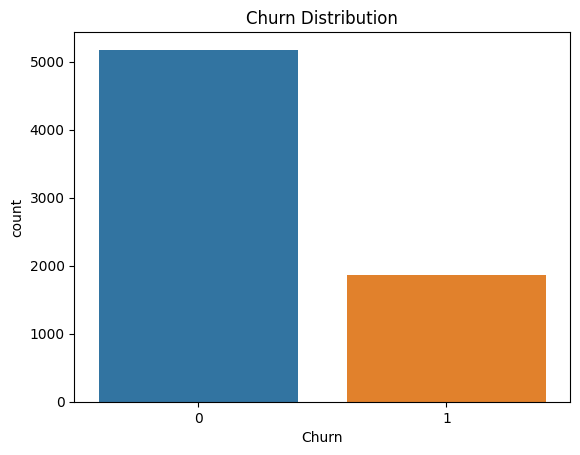

In [167]:
# Plot the distribution of the target variable
print(data['Churn'].value_counts())
sns.countplot(x='Churn', data = data)
plt.title('Churn Distribution')
plt.show()

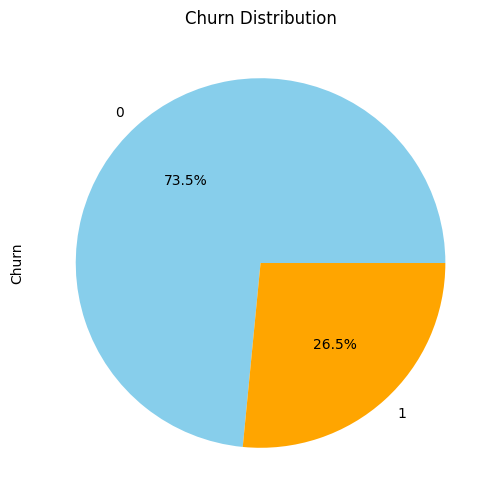

In [168]:
# Plot a pie chart for the distribution of the target variable
plt.figure(figsize=(6, 6))
data['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Churn Distribution')
plt.show()

In [169]:

encoded_columns = ['gender', 'SeniorCitizen', 'Partner', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod']

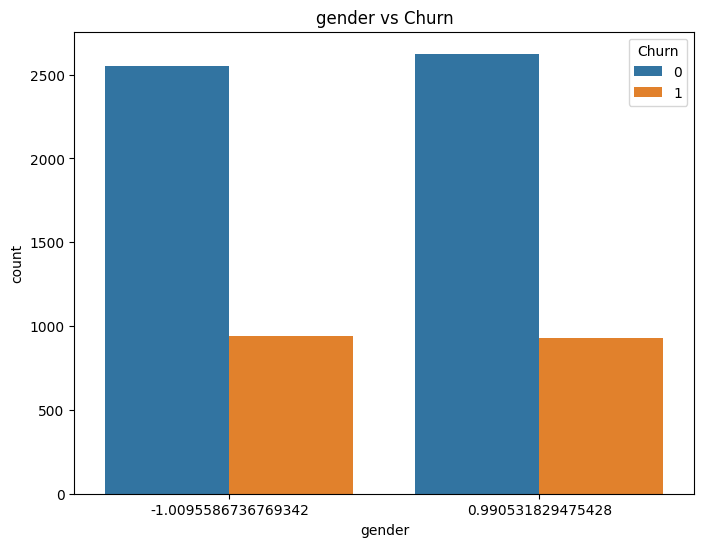

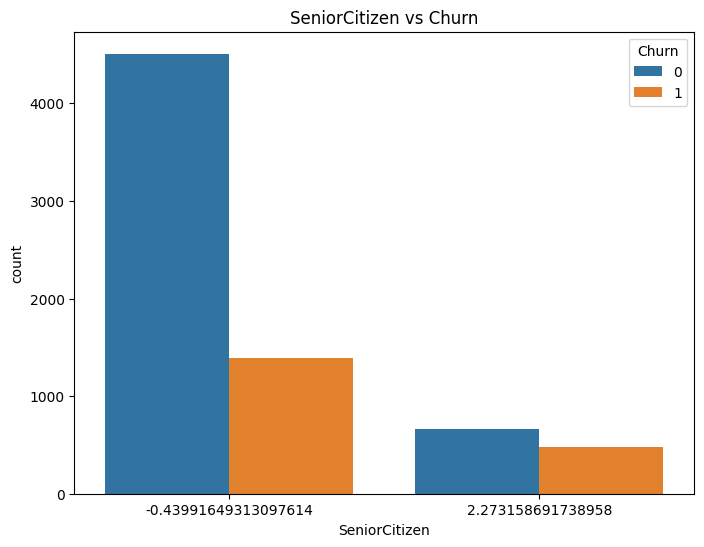

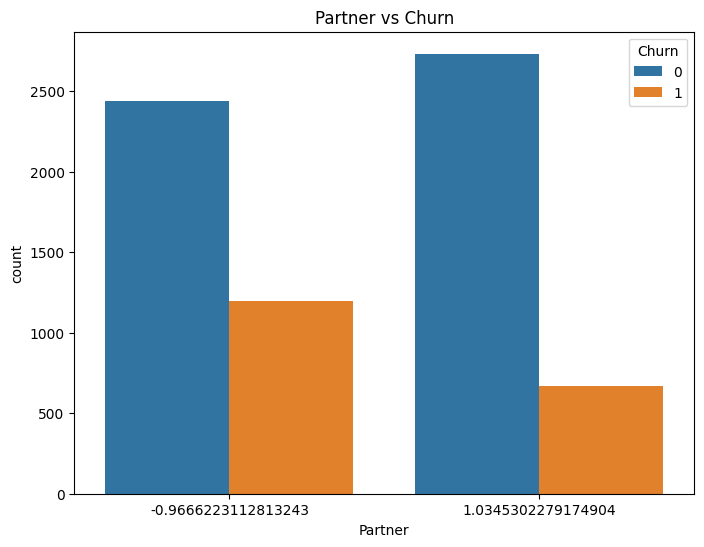

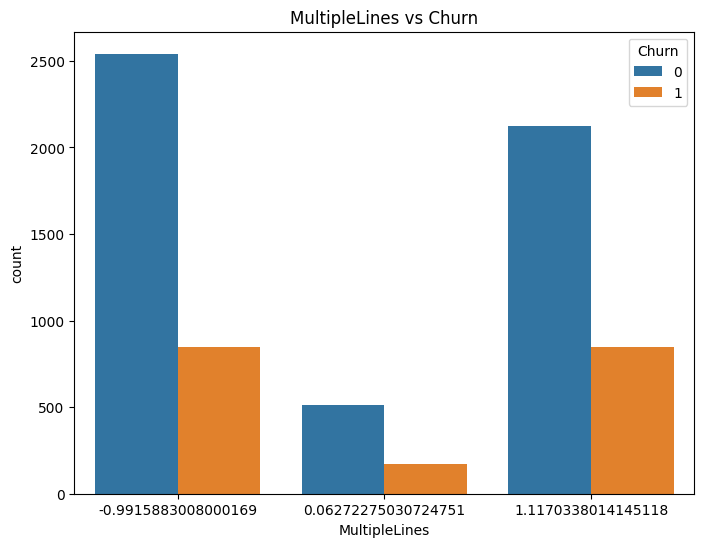

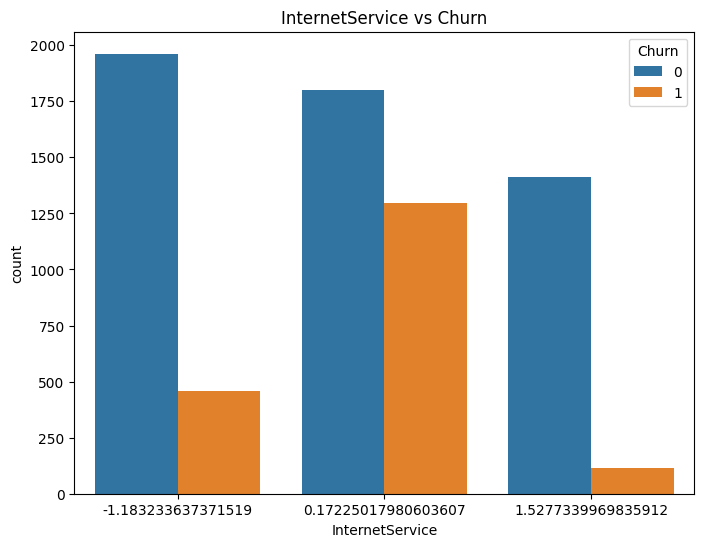

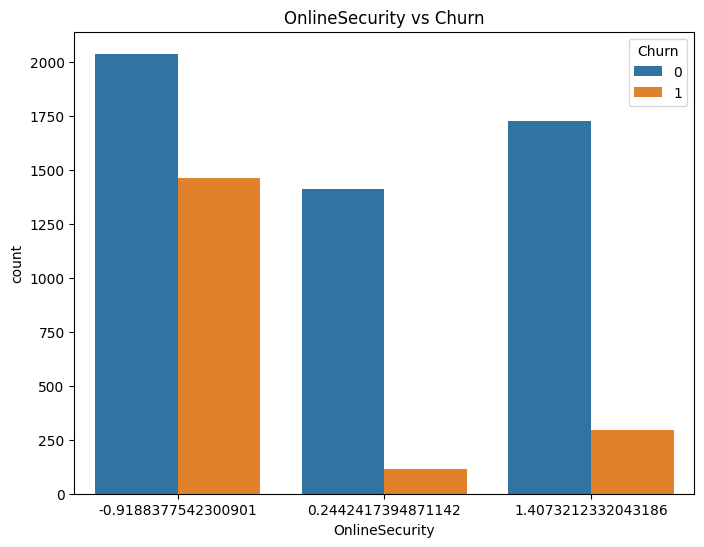

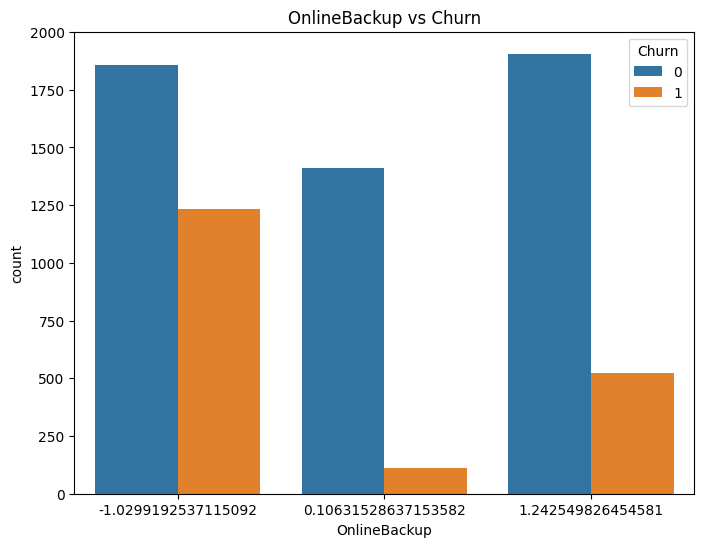

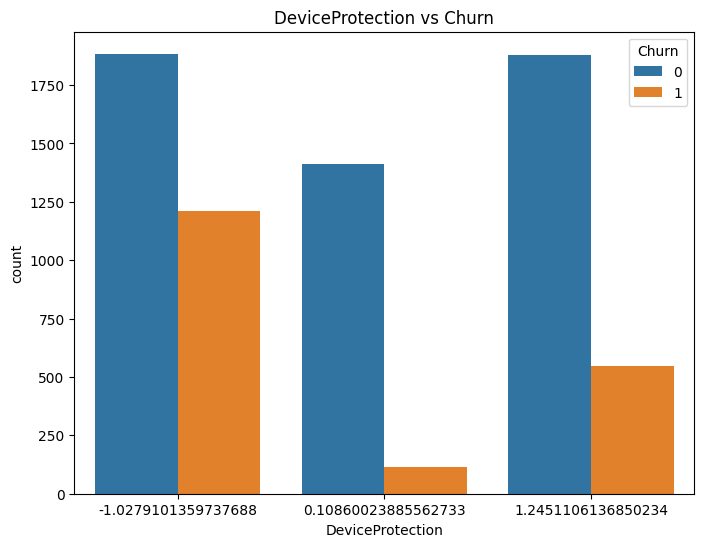

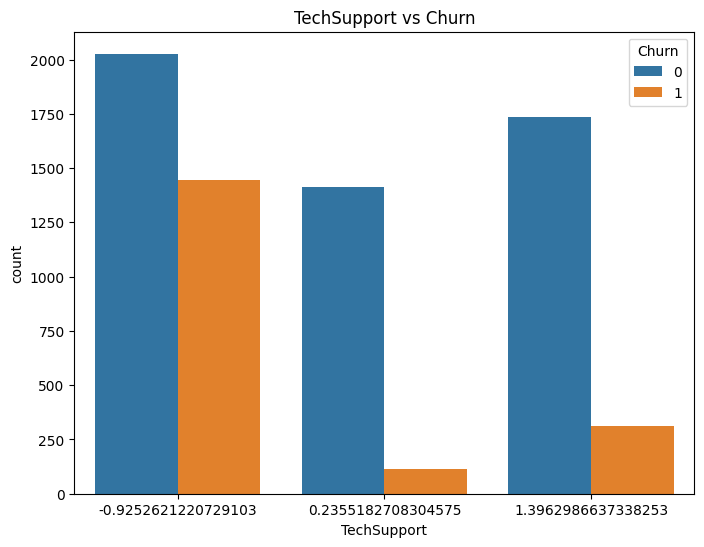

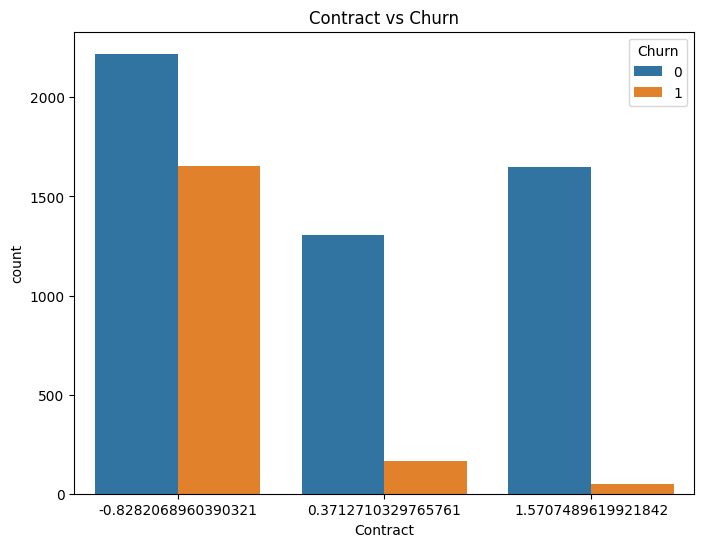

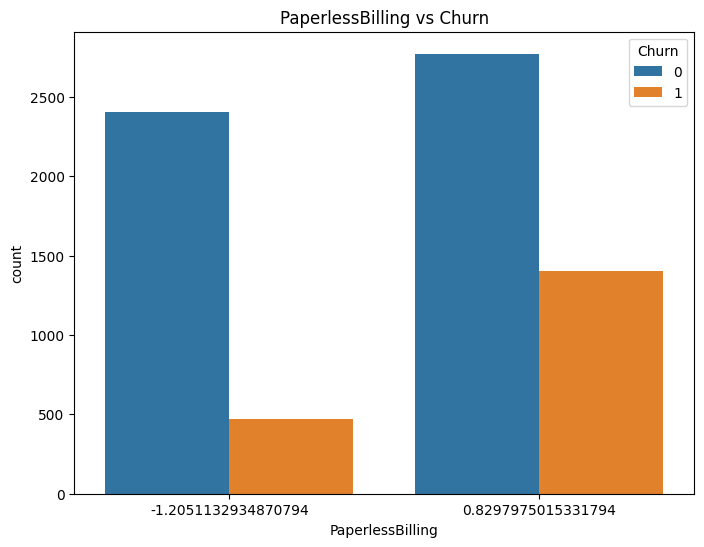

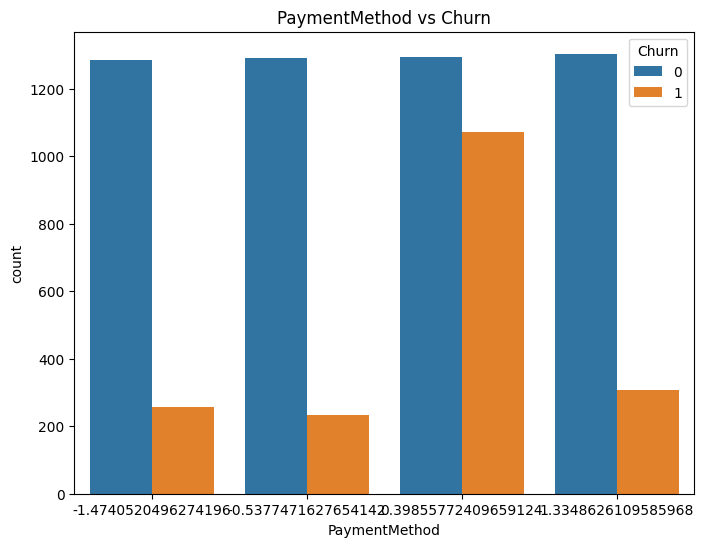

In [170]:
# Plot count plots for encoded categorical columns against the target variable
for feature in encoded_columns :
  plt.figure(figsize=(8,6))
  sns.countplot(x=feature, hue='Churn',data=data)
  plt.title(f'{feature} vs Churn')
  plt.show

In [171]:
numerical_features = ['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']

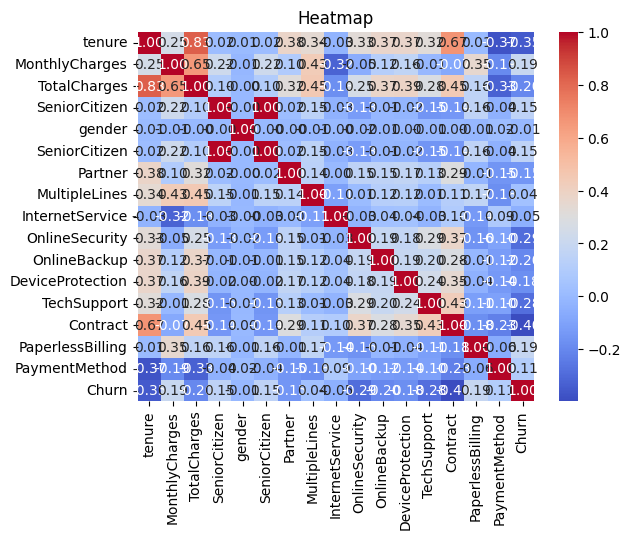

In [172]:
# Extract numerical features and encoded columns for correlation matrix
corr = data[numerical_features+ encoded_columns+['Churn']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm',fmt ='.2f')
plt.title('Heatmap')
plt.show()

# Functional API

In [173]:
# Import TensorFlow and Keras for neural network modeling
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from sklearn.metrics import accuracy_score
from keras.optimizers import Adam

In [174]:
# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# Define the neural network architecture
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)



In [176]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
177/177 [==============================] - 2s 4ms/step - loss: 0.4652 - accuracy: 0.7716 - val_loss: 0.4139 - val_accuracy: 0.8105
Epoch 2/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4320 - accuracy: 0.7930 - val_loss: 0.4062 - val_accuracy: 0.8133
Epoch 3/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4248 - accuracy: 0.7964 - val_loss: 0.4011 - val_accuracy: 0.8155
Epoch 4/50
177/177 [==============================] - 1s 5ms/step - loss: 0.4214 - accuracy: 0.7978 - val_loss: 0.4014 - val_accuracy: 0.8155
Epoch 5/50
177/177 [==============================] - 1s 6ms/step - loss: 0.4182 - accuracy: 0.7973 - val_loss: 0.4007 - val_accuracy: 0.8119
Epoch 6/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4166 - accuracy: 0.8024 - val_loss: 0.4026 - val_accuracy: 0.8133
Epoch 7/50
177/177 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8033 - val_loss: 0.4044 - val_accuracy: 0.8077
Epoch 

In [177]:
# Evaluate the model on training data
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

177/177 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8364


83.63507390022278

In [178]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

45/45 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8013
Test Loss: 0.4435
Test Accuracy: 80.1278


In [179]:

# Plot training and validation loss
epochs = range(1, len(history.history['loss']) + 1)


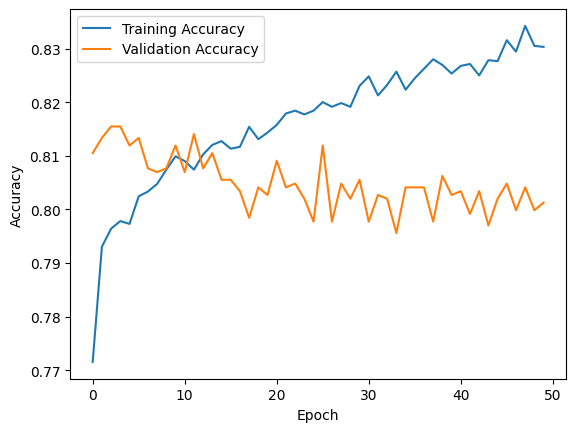

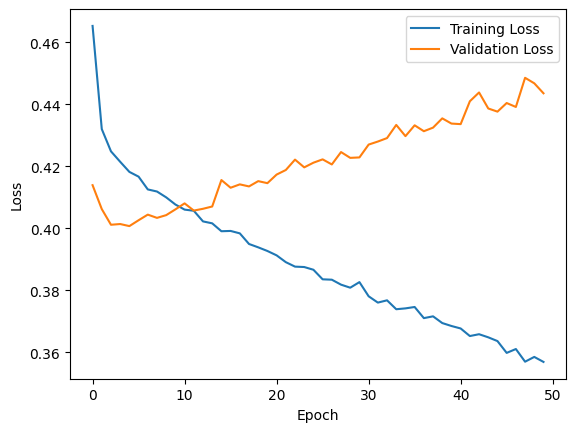

In [180]:
# Visualize the train and test losses
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [181]:
# Install scikeras library
!pip install scikeras


# Hyperparameter Tuning with GridSearch and Cross-Validation

In [182]:
# Grid search for hyperparameter tuning using scikeras
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scikeras.wrappers import KerasClassifier
from sklearn.pipeline import Pipeline

In [183]:
# Split the dataset for training, validation, and testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [184]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [185]:
# Save the scaler for future use
import pickle
pickle_out = open("scaler.pkl", "wb")
pickle.dump(scaler, pickle_out)
pickle_out.close()

In [186]:
# Function to create the neural network model

def create_model(dropout_rate=0.2):
    input_layer = Input(shape=(X_train.shape[1],))
    hidden_layer_1 = Dense(32, activation='relu')(input_layer)
    dropout_1 = Dropout(dropout_rate)(hidden_layer_1)

    hidden_layer_2 = Dense(24, activation='relu')(dropout_1)
    dropout_2 = Dropout(dropout_rate)(hidden_layer_2)

    hidden_layer_3 = Dense(12, activation='relu')(dropout_2)
    dropout_3 = Dropout(dropout_rate)(hidden_layer_3)

    output_layer = Dense(1, activation='sigmoid')(dropout_3)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [187]:
# Define the hyperparameter grid for grid search
param_grid = {
    'batch_size': [32, 64],
    'dropout_rate': [0.2, 0.5],
    'epochs': [10, 20, 30],
    'optimizer': ['adam', 'sgd'],

}

In [188]:
# Create a KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model,dropout_rate=0.2,epochs=10, batch_size=64, verbose=0)


In [189]:
# Create a pipeline with standard scaler and KerasClassifier
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', keras_classifier)])


In [190]:
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [191]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=cv, scoring='accuracy', verbose=1)
grid_result = grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

# Retraining Model

In [192]:
# Display the best parameters and accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: {:.2f}%".format(grid_result.best_score_ * 100))


Best Parameters:  {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'optimizer': 'adam'}
Best Accuracy: 80.14%


In [193]:
# Extract the best model from the grid search result
best_model = grid_result.best_estimator_

# Extract the best parameters
best_params = grid_result.best_params_

# Update the model with the best parameters
best_model.set_params(**best_params)

# Retrain the model with the updated parameters
best_model.fit(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
print("Test Accuracy of the Best Model: {:.2f}%".format(test_accuracy * 100))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Test Accuracy of the Best Model: 78.84%


# Accuracy and AUC Score

In [194]:
# Import necessary metrics for evaluation
from sklearn.metrics import accuracy_score, roc_auc_score

# Predict the target variable on test data
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print(f"AUC Score: {auc_score:.4f}")

Test Accuracy: 78.84%
AUC Score: 0.7125


In [195]:
# Save the AUC score to a file
with open("auc_score.txt", "w") as file:
    file.write(f"AUC Score: {auc_score:.4f}")

In [196]:
# Save the final model
best_model.model_.save("finalmodel.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Confusion Matrix

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       517
           1       0.61      0.55      0.58       187

    accuracy                           0.79       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.78      0.79      0.78       704



Text(183.22222222222223, 0.5, 'True\xa0Number')

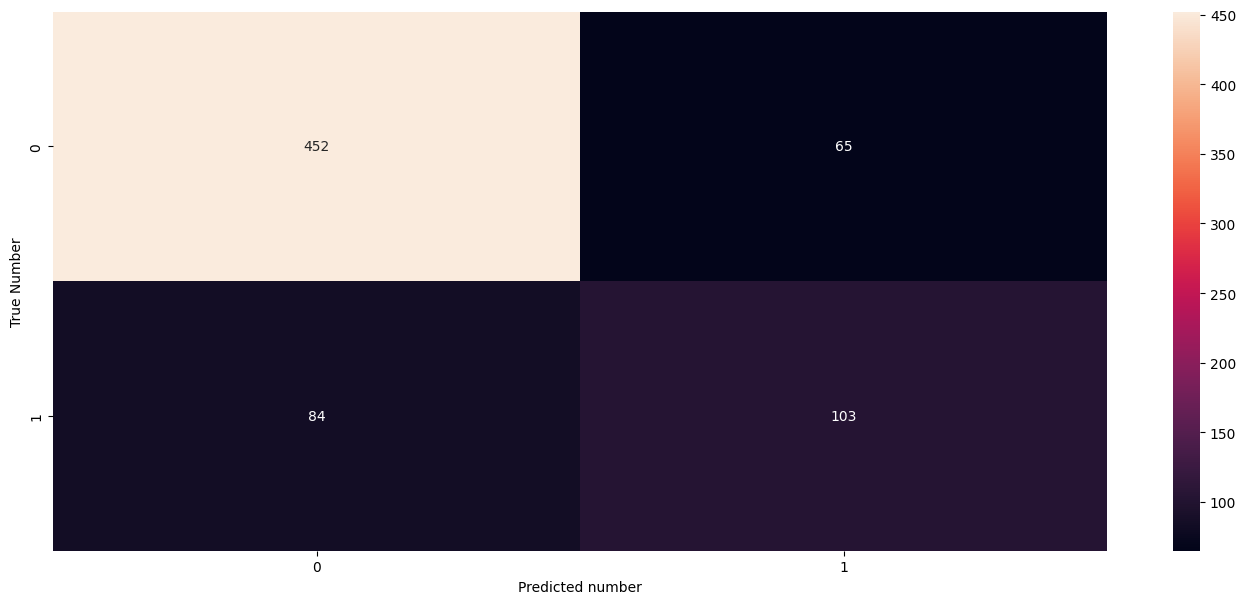

In [197]:
# Display the classification report
print(classification_report(y_test,y_pred))

# ploting the confusion matrix plot
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (17,7))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted number')
plt.ylabel('True Number')